### Setting up: Installing Libraries



In [1]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 7.7 MB/s 
     |████████████████████████████████| 451 kB 59.1 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 1.9 MB 44.1 MB/s 
     |████████████████████████████████| 9.2 MB 10.7 MB/s 
     |████████████████████████████████| 5.8 MB 61.3 MB/s 
     |████████████████████████████████| 1.3 MB 51.0 MB/s 
     |████████████████████████████████| 7.6 MB 62.4 MB/s 
     |████████████████████████████████| 182 kB 54.7 MB/s 
     |████████████████████████████████| 182 kB 54.0 MB/s 
     |████████████████████████████████| 168 kB 58.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 168 kB 80.9 MB/s 
     |████████████████████████████████| 166 kB 21.3 MB/s 
     |████████████████████████████████| 166 kB 69.7 MB/s 
     |██████████████████████████████

In [49]:
import os
import numpy as np
import pandas as pd
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel
import matplotlib.pyplot as plt
from sklearn import model_selection
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install neattext
import neattext.functions as nfx

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading Data

In [70]:
df = pd.read_csv('/content/drive/MyDrive/tweet_emotions.csv',names=['tweet_id','labels','text']).drop('tweet_id',axis=1).drop(0)

## Data Exploration

In [71]:
df.head()

,labels,text
1,empty,@tiffanylue i know i was listenin to bad habi...
2,sadness,Layin n bed with a headache ughhhh...waitin o...
3,sadness,Funeral ceremony...gloomy friday...
4,enthusiasm,wants to hang out with friends SOON!
5,neutral,@dannycastillo We want to trade with someone w...


In [72]:
df[df['labels']=="empty"]['labels'].value_counts()

empty    827
Name: labels, dtype: int64

In [73]:
df['labels'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [74]:
df['labels'].replace('empty', np.nan, inplace=True)
df.dropna(subset=['labels'], inplace=True)

In [75]:
df['labels'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
enthusiasm     759
boredom        179
anger          110
Name: labels, dtype: int64

In [76]:
lb= df['labels'].tolist()
leng= len(lb)

In [77]:
dtf= {'neutral': 8638,'worry':8459,'happiness':5209,'sadness':5165,'love':3842,'surprise':2187,'fun':1776,'relief':1526,'hate':1323,'enthusiasm': 759,'boredom': 179,'anger':110}

### Data Visualization

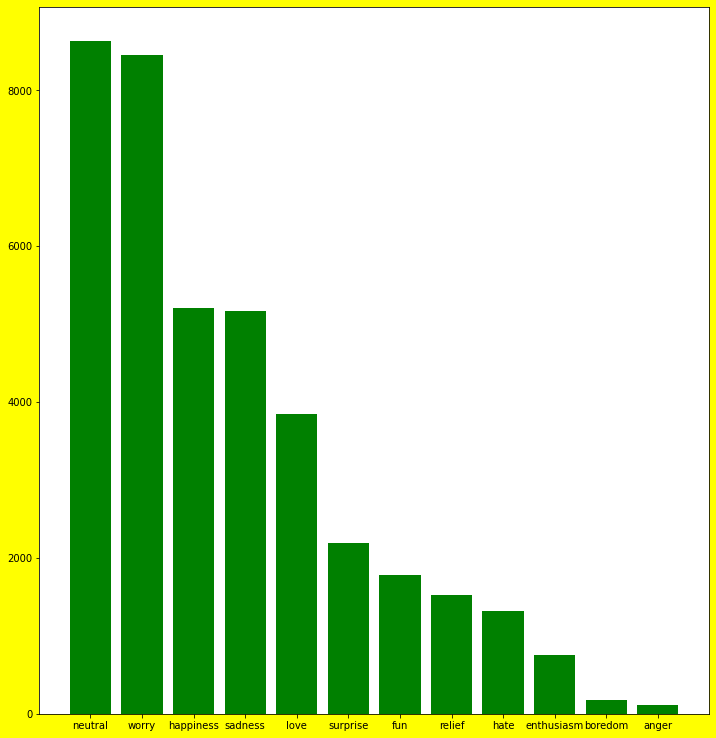

In [78]:
plt.figure(figsize=(12,13),facecolor='yellow')
plt.bar(list(dtf.keys()), dtf.values(), color='g')
plt.show()

### Data Preprocessing

In [79]:
df['text'] = df['text'].apply(nfx.remove_userhandles)

df['text']= df['text'].apply(nfx.remove_puncts)

In [80]:
df['labels'].replace('hate','anger', inplace=True)
df['labels'].replace('enthusiasm','fun', inplace=True)
df['labels'].replace('boredom', 'neutral', inplace=True)
df['labels'].replace('relief', 'happiness', inplace=True)
df['labels'].replace('fun', 'happiness', inplace=True)

In [81]:
df['labels'].replace('neutral', np.nan, inplace=True)
df.dropna(subset=['labels'], inplace=True)

In [82]:
df['labels'].value_counts()

happiness    9270
worry        8459
sadness      5165
love         3842
surprise     2187
anger        1433
Name: labels, dtype: int64

### Label Encoding and Train-Test split

In [83]:
df['labels'], uniqs = pd.factorize(df['labels'])
train, val = model_selection.train_test_split(df,test_size=0.4)
val, test = model_selection.train_test_split(val, test_size=0.5)

### Model Fitting

In [50]:
model_args = ClassificationArgs(num_train_epochs=1)

# model = MultiLabelClassificationModel(
#     'bert','bert-base-cased',num_labels=12
# )

model = ClassificationModel(
    "bert", "bert-base-uncased", args=model_args, num_labels=6
)

model2 = ClassificationModel(
    "roberta", "roberta-base", args=model_args, num_labels=6
)

model3 = ClassificationModel(
    "distilbert", 'distilbert-base-uncased',args=model_args, num_labels=6
)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [61]:
os.system('rm -r outputs runs')
model.train_model(train)
os.system('rm -r outputs runs')
model2.train_model(train)
os.system('rm -r outputs runs')
model3.train_model(train)
os.system('!rm -r outputs runs')


  0%|          | 0/18213 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/2277 [00:00<?, ?it/s]

32512

Score Prediction on Test Data

In [54]:
import sklearn.metrics as metrics
result, model_outputs, wrong_predictions = model.eval_model(val)
preds = np.argmax(model_outputs,axis=1)
print(metrics.accuracy_score(val['labels'],preds))

  0%|          | 0/6071 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/759 [00:00<?, ?it/s]

0.48855213309174766


In [55]:
result1, model_outputs1, wrong_predictions1 = model2.eval_model(val)
preds2 = np.argmax(model_outputs1,axis=1)
print(metrics.accuracy_score(val['labels'],preds2))

  0%|          | 0/6071 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/759 [00:00<?, ?it/s]

0.510624279360896


In [62]:
result2, model_outputs2, wrong_predictions2 = model3.eval_model(val)
preds3 = np.argmax(model_outputs2,axis=1)
print(metrics.accuracy_score(val['labels'],preds3))

  0%|          | 0/6071 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/759 [00:00<?, ?it/s]

0.4742217097677483


### Prediction on Sentences

In [101]:
predictions1, raw_outputs1 = model.predict(["Today we will have a party, do join"])
predictions2, raw_outputs2 = model2.predict(["I have my algorithm final on Wednesday, ugh"])
predictions3, raw_outputs3 = model3.predict(["I had a tasty lunch today"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
predictions1, predictions2, predictions3

([1], [0], [1])

In [103]:
print(pd.factorize(df['labels'])[1])

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


In [104]:
print(f'Bert model: The sentence one conveys: {uniqs[predictions1][0]}')
print(f'Roberta model: The sentence two conveys: {uniqs[predictions2][0]}')
print(f'DistillBert model: The sentence three conveys: {uniqs[predictions3][0]}')

Bert model: The sentence one conveys: happiness
Roberta model: The sentence two conveys: sadness
DistillBert model: The sentence three conveys: happiness
